In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=["SepalLength","SepalWidth","PetalLength","PetalWidth"])
df["Species"]=iris.target
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


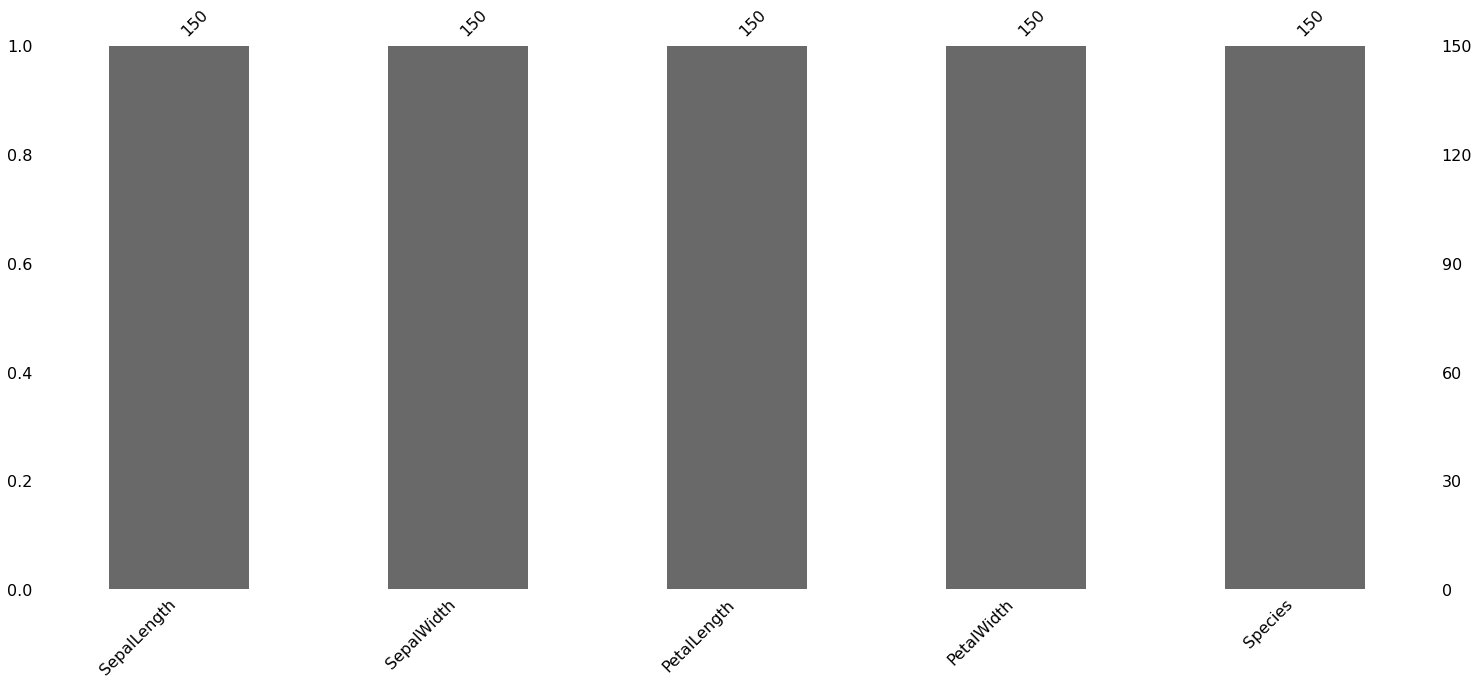

In [ ]:
import missingno as msn
msn.bar(df.iloc[:,0:13])

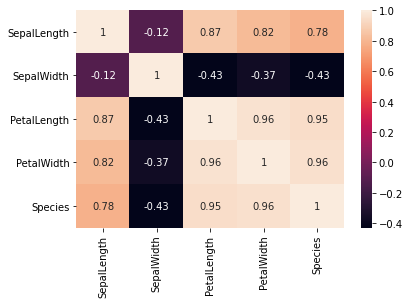

In [ ]:
import seaborn as sns
sns.heatmap(df.iloc[:,:13].corr(),annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X=df.iloc[:,0:3]
Y=df.iloc[:,4]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)
X_scaled

array([[ 1.        , -0.90068117,  1.01900435, -1.34022653],
       [ 1.        , -1.14301691, -0.13197948, -1.34022653],
       [ 1.        , -1.38535265,  0.32841405, -1.39706395],
       [ 1.        , -1.50652052,  0.09821729, -1.2833891 ],
       [ 1.        , -1.02184904,  1.24920112, -1.34022653],
       [ 1.        , -0.53717756,  1.93979142, -1.16971425],
       [ 1.        , -1.50652052,  0.78880759, -1.34022653],
       [ 1.        , -1.02184904,  0.78880759, -1.2833891 ],
       [ 1.        , -1.74885626, -0.36217625, -1.34022653],
       [ 1.        , -1.14301691,  0.09821729, -1.2833891 ],
       [ 1.        , -0.53717756,  1.47939788, -1.2833891 ],
       [ 1.        , -1.26418478,  0.78880759, -1.22655167],
       [ 1.        , -1.26418478, -0.13197948, -1.34022653],
       [ 1.        , -1.87002413, -0.13197948, -1.51073881],
       [ 1.        , -0.05250608,  2.16998818, -1.45390138],
       [ 1.        , -0.17367395,  3.09077525, -1.2833891 ],
       [ 1.        , -0.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
n=1000
alpha=0.01
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
    cost_gradient=np.zeros(k)
    z=X_train.dot(beta)
    predicted=1/(1+np.exp(-z))
    difference=predicted-Y_train
    for j in range(k):
        cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k):
        beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

[ 3.88283251  3.29143416 -1.19656536  4.12509112]


In [ ]:
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
    if(Y_predict[i]>=0.5):
        Y_label[i]=1
Y_label

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.])